# Pandas_Introduction

This is a quick overview of using pandas as a tool for data and statistical analaysis. Covid-19 data is drawn from the state of Tennessee to use for demonstration. 
This is based upon the [pandas_fun](https://github.com/chrisiacovella/pandas_fun) repository.  For a more detailed tutorial on pandas see [this tutorial](https://github.com/stefmolin/pandas-workshop).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Converting a dictionary to a Pandas dataframe
Let us define some data as a simple dictionary and then convert it to a pandas dataframe

In [4]:
data_dict = { 
	'run1': [360, 0.91, 20.1],
	'run2': [305, 0.98, 22.0]
}

This dictionary can be easily converted  to a pandas dataframe.  We can also pass labels via "index", to define what each of the entries in the array correspond to, which will also allow us to more easily search for specific data.

In [5]:
data_frame = pd.DataFrame(data_dict, index=['T', 'S2', 'angle'])

Pands makes it easy to output this as a table.

In [6]:
data_frame

,run1,run2
T,360.00,305.00
S2,0.91,0.98
angle,20.10,22.00


If we use the print function the output is basically the same, just not quite as nicely formatted. 

In [7]:
print(data_frame)

         run1    run2
T      360.00  305.00
S2       0.91    0.98
angle   20.10   22.00


The display function will output the nicely formatted table.

In [8]:
display(data_frame)

,run1,run2
T,360.00,305.00
S2,0.91,0.98
angle,20.10,22.00


## Extracting information
Let's now examine how to extract information from the dataframe.   

To get info for a single entry that was define in our original dict, we can just use the name of that key as the index.

In [9]:
data_frame['run1']

T        360.00
S2         0.91
angle     20.10
Name: run1, dtype: float64

To get the Temperature info from each of the runs, we access the data a little bit differently, using the "loc" command.  Here, we will take advantage of the fact that when we created the pandas dataframe from the dictionary, we  defined index labels.

In [11]:
data_frame.loc['T']

run1    360.0
run2    305.0
Name: T, dtype: float64

These two ways of access data can be combined, e.g., to print out the temperature of run1.

In [12]:
data_frame['run1'].loc['T']

360.0

Alternatively, to access the temperature of run1, we can think of this as a 2d array, passing the index label, or, since  T is the first entry, using an integer index of 0:

In [13]:
data_frame['run1'][0]

360.0

In [14]:
data_frame['run1']['T']

360.0

## Read/writing CSV files
Pandas includes functions that make it trivial to write to common file formats.  For example, to write a dataframe to CSV file:

In [23]:
data_frame.to_csv(r'test_data.csv', index=True)

We can also read directly from a CSV file

In [28]:
data_frame_from_csv = pd.read_csv('test_data.csv',index_col=0)

If we print the dataframe we just loaded, we will see it is identical to what we wrote. 

In [29]:
data_frame_from_csv

,run1,run2
T,360.00,305.00
S2,0.91,0.98
angle,20.10,22.00


## Working with data in dataframes

Let's create some totally fictitious data for T and PE for two different runs (data that most likely would be read in from a simulation energy file or the result of analysis by a code and wouldn't be defined by hand).  We will then make a dataframe for each run and then put these in a dictionary.   

By using a dictionary we can again, hone in on specific pieces of information, like e.g., only run2

In [75]:
run1_data = { 
	'T': [300, 305, 310, 315, 310, 315, 320, 325, 320, 315, 310, 315],
	'PE': [1489, 1523, 1649, 1554, 1634, 1780, 1900, 1843, 1724, 1652, 1400, 1323]
}

run2_data = { 
	'T': [300, 305, 305, 310, 315, 320, 325, 320, 325, 320, 315, 320],
	'PE': [1482, 1512, 1432, 1623, 1723, 1849, 1948, 2200, 2129, 2003, 1802, 1938]
}

r1_pd = pd.DataFrame(run1_data)
r2_pd = pd.DataFrame(run2_data)


sim_data_dict = {'run1': r1_pd,  'run2': r2_pd}


In [87]:
sim_data_dict['run2']

,T,PE
0,300,1482
1,305,1512
2,305,1432
3,310,1623
4,315,1723
5,320,1849
6,325,1948
7,320,2200
8,325,2129
9,320,2003


We can plot our data of course, using the key value in the dictionary to label each line.

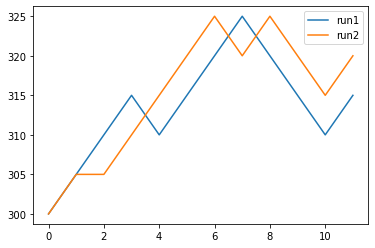

In [76]:
for sim in sim_data_dict:
    plt.plot(sim_data_dict[sim]['T'], label=sim)
plt.legend()

This is of course not the only way to define a dataspace.  For example, instead of having a dictionary be the top level container with the entires being pandas dataframes, we could put the run1_data and run2_data dictionaries into a dictionary, then convert that to a pandas dataframe. 

In [77]:
sim_data_dict2 = {'run1': run1_data,  'run2': run2_data}

sim_df = pd.DataFrame(sim_data_dict2)    

The one drawback of this is if we wish to look at just a single entry, e.g., run1, we lose the automatic formatting we had in the approach above, but we wold essentially interact with the the dataframe in the same way.

In [85]:
sim_df['run1']

[300, 305, 310, 315, 310, 315, 320, 325, 320, 315, 310, 315]

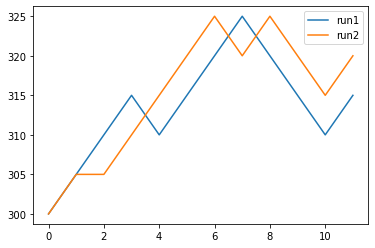

In [80]:
for sim in sim_df:
    plt.plot(sim_df[sim]['T'], label=sim)
    plt.legend()

There are some built in functions that make things easy to get information quickly out.

In [88]:
print(sim_data_dict['run1']['T'].mean(), '+/-', sim_data_dict['run1']['T'].std())

313.3333333333333 +/- 6.853444168423418


We can easily export to a numpy array as well.  A quick note, pandas uses the Bessel's correction in the standard deviation formulat. That is using N-1, rather than N.  So this will give a slightly different value than numpy.std(). 

In [89]:
T_array = sim_data_dict['run1']['T'].to_numpy()
print(T_array.mean(), '+/-', T_array.std())

313.3333333333333 +/- 6.5616732283431745


# Example: working with real data

Let's now read in some real data as a CSV file.  This file includes information on COVID-19 cases from 3/12/20 to 5/27/21 in the state of Tennessee per day from tn.gov [Daily Case Information](https://www.tn.gov/health/cedep/ncov/data/downloadable-datasets.html)

In [90]:
tenn_data = pd.read_csv('datasets/Tenn_Pandemic_Data.csv')

In [91]:
tenn_data

,DATE,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEG_TESTS,TOTAL_TESTS,...,NEW_DEATHS,TOTAL_DEATHS,NEW_ACTIVE,TOTAL_ACTIVE,NEW_INACTIVE_RECOVERED,TOTAL_INACTIVE_RECOVERED,NEW_HOSP,TOTAL_HOSP,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
0,5/27/21,862401,405,710379,262,152022,143,818866,7142537,7961403,...,13,12441,-236,4898,628,845062,3,21918,12433,1
1,5/26/21,861996,516,710117,366,151879,150,818539,7132186,7950725,...,22,12428,-102,5134,596,844434,13,21915,12432,6
2,5/25/21,861480,437,709751,282,151729,155,818109,7120354,7938463,...,6,12406,-184,5236,615,843838,9,21902,12426,8
3,5/24/21,861043,464,709469,317,151574,147,817798,7111391,7929189,...,7,12400,-319,5420,776,843223,13,21893,12418,2
4,5/23/21,860579,258,709152,190,151427,68,817424,7103890,7921314,...,6,12393,-225,5739,477,842447,9,21880,12416,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,3/16/20,14,4,14,4,0,0,24,588,612,...,0,0,4,14,0,0,2,3,0,0
438,3/15/20,10,4,10,4,0,0,21,431,452,...,0,0,4,10,0,0,0,1,0,0
439,3/14/20,6,5,6,5,0,0,19,403,422,...,0,0,5,6,0,0,1,1,0,0
440,3/13/20,1,0,1,0,0,0,2,85,87,...,0,0,0,1,0,0,0,0,0,0


You can see by the way this has been imported, the dictionary keys are 'DATE', 'TOTAL_CASES', 'NEW_CASES', and etc., so we can use these to extract out specific information.  For example, let's plot  'DATE' and 'TOTAL_CASES'

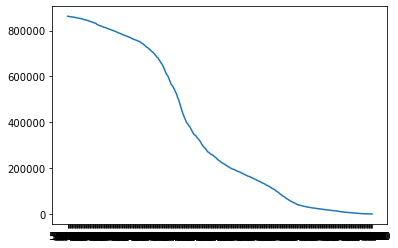

In [92]:
plt.plot(tenn_data['DATE'], tenn_data['TOTAL_CASES'])

It's rather difficult to read that x-axis, let's do some quick formatting. 

Text(0.5, 0, 'date')

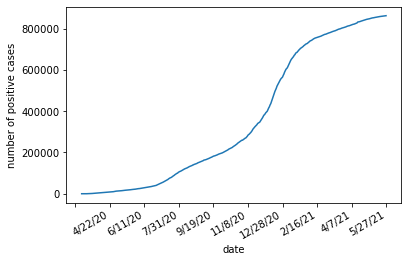

In [93]:
#first let's make a copy of the data that gives the date/time of update
formatted_date = tenn_data['DATE'][:].copy()
#next, let's only keep the date, discarding the time, this is just the first
#10 characters of the string
formatted_date = [date.replace(date[10:], '') for date in formatted_date]

fig, ax = plt.subplots()

#to be able to read the labels, we'll use a built-in function to tilt them
fig.autofmt_xdate()

# and then define the number of tick markers to show a more manageable set
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.plot(formatted_date, tenn_data['TOTAL_CASES'])
ax.invert_xaxis()

plt.ylabel('number of positive cases')
plt.xlabel('date')

It's rather easy to just restrict the data range we plot, e.g., let's just pick out data from the "beginning" where the number of cases was most rapidly growing (the end of this window roughly corresponds  with the end of the first wave, around 07-31-20).  Note, the data is formatted with the latest data coming first and oldest data last: 

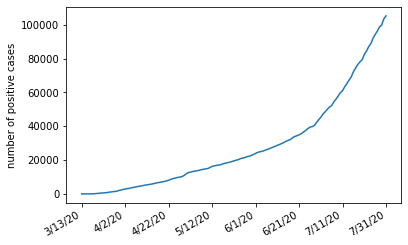

In [94]:
fig, ax = plt.subplots()

#to be able to read the labels, we'll use a built in function to tilt them
fig.autofmt_xdate()
# and then define the number of tick markers to show
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.plot(formatted_date[300:-1], tenn_data['TOTAL_CASES'][300:-1])
plt.ylabel('number of positive cases')
ax.invert_xaxis()

Let us  use the scipy optimize routine to fit this region, so we can interpolate the initial exponential growth. For more information of scipy, follow this [link.](https://docs.scipy.org/doc/scipy/reference/index.html)

In [95]:
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [96]:
# Create an array of 'N' points from 1 to 0 corresponding to the number of entrees
# This is necessary since the x-axis is dates rather than floats, and is in a reversed order

xdata = np.linspace(1, 0, len(tenn_data['TOTAL_CASES']))

#fit the curve, but limit to that middle data above
popt, pcov = curve_fit(exp_func, xdata[300:-1], tenn_data['TOTAL_CASES'][300:-1])

Curve fit doesn't give you an R-squared value by default, so we just need to do a few quick calculations.

In [97]:
residuals = tenn_data['TOTAL_CASES'][300:-1]- exp_func(xdata[300:-1], *popt)
#calculate residual sum of squares
ss_res = np.sum(residuals**2)
#get the total sum of squares
ss_tot = np.sum((tenn_data['TOTAL_CASES'][300:-1]-np.mean(tenn_data['TOTAL_CASES'][300:-1]))**2)
#get the r-squared value
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9945568860185705


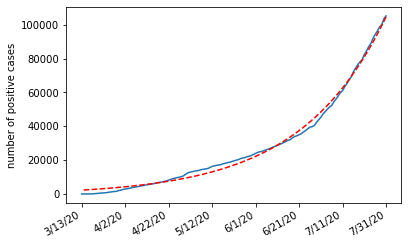

In [98]:
fig, ax = plt.subplots()

#to be able to read the labels, we'll use a built in function to tilt them
fig.autofmt_xdate()
# and then define the number of tick markers to show
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.plot(formatted_date[300:-1], tenn_data['TOTAL_CASES'][300:-1])
ax.plot(formatted_date[300:-1],  exp_func(xdata[300:-1], *popt), 'r--')


plt.ylabel('number of positive cases')
ax.invert_xaxis()